# Analyzing Global COVID-19 Data in Python

## Data Source

The data is downloaded from [European Centre for Disease Prevention](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide) and Control. Upload the data to an S3 bucket, and import the necessary python libraries.

In [1]:
%matplotlib inline
import pandas

In [2]:
import numpy as np

### Importing Data from S3

In [3]:
df = pandas.read_excel('s3://hoss-ia241/COVID-19-geographic-disbtribution-worldwide.xlsx')
df[:10] #the top 10 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-28,28,4,2020,172,0,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-04-27,27,4,2020,68,10,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-04-26,26,4,2020,112,4,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-04-25,25,4,2020,70,1,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-04-24,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-04-23,23,4,2020,84,4,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-04-22,22,4,2020,61,1,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-04-21,21,4,2020,35,2,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-04-20,20,4,2020,88,3,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-04-19,19,4,2020,63,0,Afghanistan,AF,AFG,37172386.0,Asia


## Analysis

### The Total Global Deaths Per Day

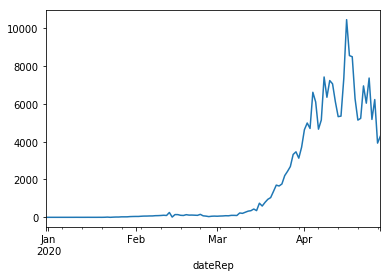

In [4]:
sum_dot = df.groupby('dateRep').sum()['deaths']

sum_dot.plot()

There was an exponential rise in new deaths between March and mid-April. The number of new deaths globally is decreasing. 

### Distribution of COVID-19 Cases Among Top 10 Countries 

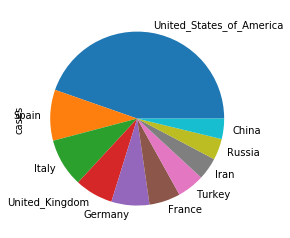

In [5]:
case_count = df.groupby('countriesAndTerritories').sum()['cases'].sort_values(ascending=False)[:10]
case_count.plot.pie()

The United States has the highest distribution of cases of COVID-19 globally. 

### How the Number of Cases is Related to the Number of Deaths

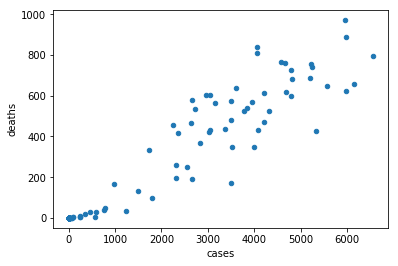

In [6]:
italy_data = df.loc[df['countriesAndTerritories'] == 'Italy']
italy_data.plot.scatter(x='cases',y='deaths')

The graph indicates a corrolaton between the number of cases and the number of deaths.

### Highest Number of Deaths On A Single Day

In [7]:
print('The highest number of deaths in a single day is {} people.'.format(np.amax(df['deaths'])))

The highest number of deaths in a single day is 4928 people.


### Mean Number of COVID-19 Deaths Per Month in USA

In [8]:
usa_data = df.loc[df['countriesAndTerritories'] == 'United_States_of_America'].groupby('month')
usa_data.mean()['deaths']

month
1        0.000000
2        0.000000
3      102.258065
4     1895.535714
12       0.000000
Name: deaths, dtype: float64

The average number new of deaths started rising from March to April.

### Deathtoll Ranked By Continent

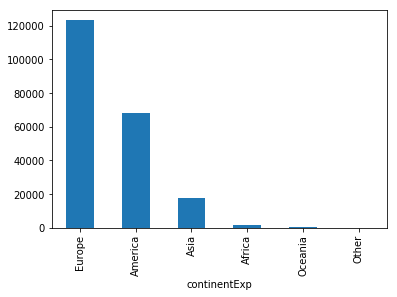

In [9]:
continent_deaths = df.groupby('continentExp').sum()['deaths']
continent_deaths.nlargest(7).plot.bar()

Europe has the highest number of deaths followed by the America, Asia, and Africa

## Conclusions

1. The total number of new cases is decreasing globally.
2. As the number of cases increase so does the number of deaths.
3. The United States has the highest number of COVID-19 cases.
4. Europe has the highest number of COVID-19 deaths.

## Limitations

1. Inherent limitations in pandas meant I could not do all the different visualisations I wanted.
2. My knowledge of Python is only beginners level.
3. The datasource only accounts for confirmed cases of COVID-19. 

I wanted to try using simple linear regression model but it did not work.
I could also benefit from having a chloropleth map visualisation for next time.